# TCC

## Coleta e análise de dados

In [222]:
# Importação de bibliotecas

# Biblioteca para mexer nos dados
import pandas

# Biblioteca para matemática
import math

# Biblioteca para caomputação numérica
import numpy as np

# Biblioteca para testes nas séries
import statsmodels.tsa.stattools as stat

# Biblioteca para modelo GARCH
from arch import arch_model

# Biblioteca para fazer gráficos
from matplotlib import pyplot as plt

In [223]:
# Importação dos dados por API

# PTAX 800
# Divulgada por: Banco Central
# Coletada por: Banco Central - Código: 1
# 01 / Taxa de câmbio - Livre - Dólar americano (venda) - diário / u.m.c./US$ / D / 28/11/1984 / Sisbacen PTAX800 / N
url_PTAX = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.1/dados?formato=csv&&dataInicial=01/01/2000&dataFinal=31/12/2018"
PTAX = pandas.read_csv(url_PTAX, sep = ";", decimal = ",")

# Selic
# Divulgada por: Banco Central
# Coletada atrasvés de: Banco Central - Código: 11
# 11 / Taxa de juros - Selic / % a.d. / D / 04/06/1986 / BCB-Demab / N
url_Selic = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&&dataInicial=01/01/2000&dataFinal=31/12/2018"
Selic = pandas.read_csv(url_Selic, sep = ";", decimal = ",")

# DI
# Divulgada por: B3 (Cetip)
# Coletada através de: Banco Central - Código: 12
# 12 / Taxa de juros - CDI / % a.d. / D / 06/03/1986 / Cetip / N
url_DI = "http://api.bcb.gov.br/dados/serie/bcdata.sgs.12/dados?formato=csv&&dataInicial=01/01/2000&dataFinal=31/12/2018"
DI = pandas.read_csv(url_DI, sep = ";", decimal = ",")

In [224]:
# Cálculo do Cupom Cambial

# Cupom Cambial de OC1
# Diferença entre taxa Selic e variação cambial (PTAX800)
CupomCambialSelic = []
for i in range(len(PTAX.valor)):
    if i >= 1:
        valor = (1+ Selic.valor[i]/100)/(PTAX.valor[i]/PTAX.valor[i-1])-1
        CupomCambialSelic.append(valor)

# Cupom Cambial de DI1
# Diferença entre taxa DI e variação cambial (PTAX800)
CupomCambialDI = []
for i in range(len(PTAX.valor)):
    if i >= 1:
        valor = (1+ DI.valor[i]/100)/(PTAX.valor[i]/PTAX.valor[i-1])-1
        CupomCambialDI.append(valor)


# Cálculo do total rendido pelo cupom cambial

# Para o Cupom Cambial de OC1
TotalSelic = [1]
for i in range(len(CupomCambialSelic)):
    if i >= 1:
        cupom = CupomCambialSelic[i] + 1
        valor = TotalSelic[i-1] * cupom
        TotalSelic.append(valor)

# Para o Cupom Cambial de DI1
TotalDI = [1]
for i in range(len(CupomCambialDI)):
    if i >= 1:
        cupom = CupomCambialDI[i] + 1
        valor = TotalDI[i-1] * cupom
        TotalDI.append(valor)

        
# Varações

#Dólar
VariacaoDolar = [0]
for i in range(len(PTAX.valor)):
    if i >= 1:
        valor = PTAX.valor[i]/PTAX.valor[i-1]-1
        VariacaoDolar.append(valor)

# Selic        
VariacaoSelic = [0]
for i in range(len(Selic.valor)):
    if i >= 1:
        valor = Selic.valor[i]/Selic.valor[i-1]-1
        VariacaoSelic.append(valor)

# DI 
VariacaoDI = [0]
for i in range(len(DI.valor)):
    if i >= 1:
        valor = DI.valor[i]/DI.valor[i-1]-1
        VariacaoDI.append(valor)

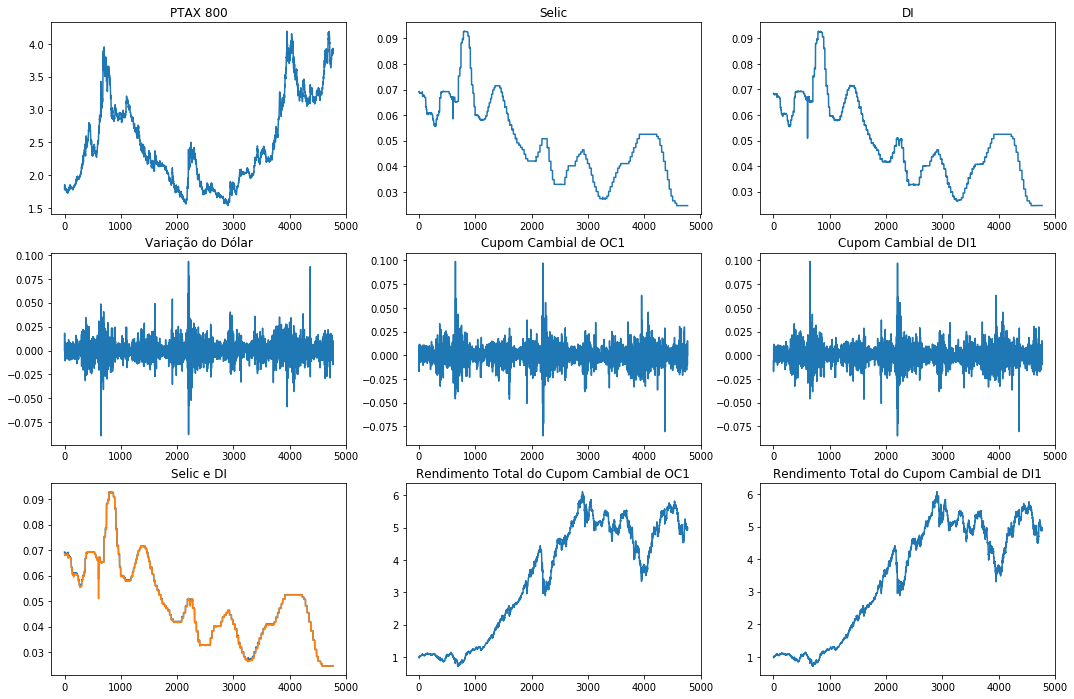

In [225]:
# Gráficos das séries

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

ax = axs[0, 0]
ax.plot(PTAX.valor)
ax.set_title('PTAX 800')

ax = axs[0, 1]
ax.plot(Selic.valor)
ax.set_title('Selic')

ax = axs[0, 2]
ax.plot(DI.valor)
ax.set_title('DI')


ax = axs[1, 0]
ax.plot(VariacaoDolar)
ax.set_title('Variação do Dólar')

ax = axs[1, 1]
ax.plot(CupomCambialSelic)
ax.set_title('Cupom Cambial de OC1')

ax = axs[1, 2]
ax.plot(CupomCambialDI)
ax.set_title('Cupom Cambial de DI1')


ax = axs[2, 0]
ax.plot(Selic.valor)
ax.plot(DI.valor)
ax.set_title('Selic e DI')

ax = axs[2, 1]
ax.plot(TotalSelic)
ax.set_title('Rendimento Total do Cupom Cambial de OC1')

ax = axs[2, 2]
ax.plot(TotalDI)
ax.set_title('Rendimento Total do Cupom Cambial de DI1')

#fig.suptitle('Gráficos')

plt.show()

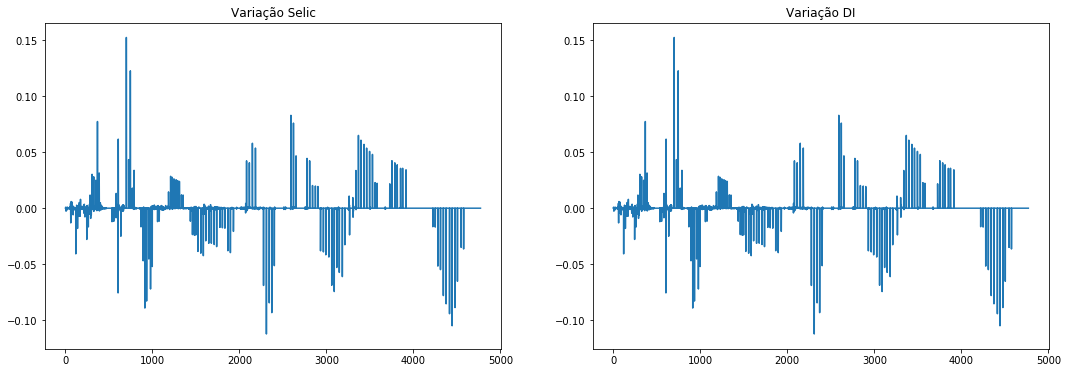

In [226]:
fig, axs = plt.subplots(ncols=2, figsize=(18, 6))

ax = axs[0]
ax.plot(VariacaoSelic)
ax.set_title('Variação Selic')

ax = axs[1]
ax.plot(VariacaoSelic)
ax.set_title('Variação DI')

plt.show()

In [227]:
# GARCH para Cupom Cambial de OC1

GarchSelic = arch_model(CupomCambialSelic)
ResultadoGarchSelic = GarchSelic.fit()

# GARCH para Cupom Cambial de DI1

GarchDI = arch_model(CupomCambialDI)
ResultadoGarchDI = GarchDI.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -16339.522318082516
Iteration:      2,   Func. Count:     21,   Neg. LLF: -16344.40012135396
Iteration:      3,   Func. Count:     35,   Neg. LLF: -16344.435858139506
Iteration:      4,   Func. Count:     49,   Neg. LLF: -16344.437020591351
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -16344.437019173105
            Iterations: 7
            Function evaluations: 58
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: -16339.492192334017
Iteration:      2,   Func. Count:     21,   Neg. LLF: -16344.364651727545
Iteration:      3,   Func. Count:     35,   Neg. LLF: -16344.4002869012
Iteration:      4,   Func. Count:     51,   Neg. LLF: -16312.094842931776
Iteration:      5,   Func. Count:     67,   Neg. LLF: 4352.138191080406
Iteration:      6,   Func. Count:     78,   Neg. LLF: -2538.7893696100214
Iteration:      7,   Func. Count:     91,   Neg. LLF: -

/Users/bernardopaulsen/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


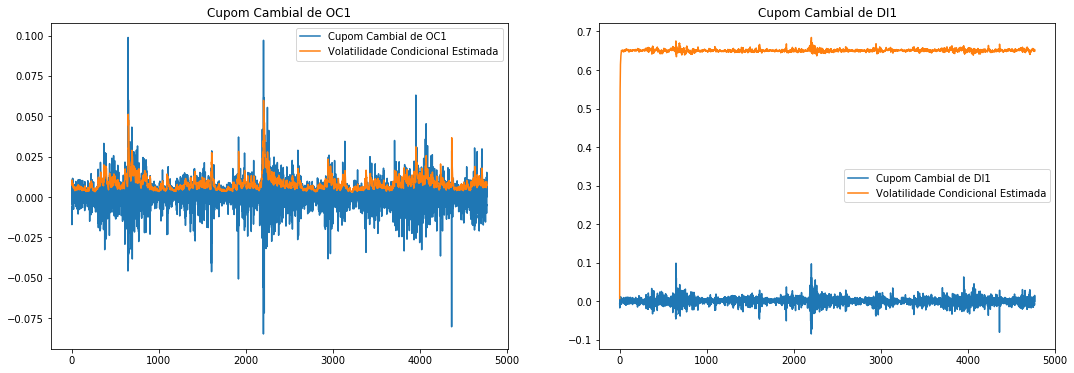

In [228]:
fig, axs = plt.subplots(ncols=2, figsize=(18, 6))

ax = axs[0]
ax.plot(CupomCambialSelic, label='Cupom Cambial de OC1')
ax.plot(ResultadoGarchSelic.conditional_volatility, label = 'Volatilidade Condicional Estimada')
ax.set_title('Cupom Cambial de OC1')
ax.legend()

ax = axs[1]
ax.plot(CupomCambialDI, label='Cupom Cambial de DI1')
ax.plot(ResultadoGarchDI.conditional_volatility, label = 'Volatilidade Condicional Estimada')
ax.set_title('Cupom Cambial de DI1')
ax.legend()

plt.show()

In [229]:
print("Cupom Cambial de OC1")
print(stat.adfuller(CupomCambialSelic))
print(stat.kpss(CupomCambialSelic))

print("Cupom Cambial de DI1")
print(stat.adfuller(CupomCambialDI))
print(stat.kpss(CupomCambialDI))

Cupom Cambial de OC1
(-13.502230138996314, 2.9616730562306979e-25, 19, 4751, {'1%': -3.4317271493727657, '5%': -2.8621485440864416, '10%': -2.5670939299608397}, -30604.475576495715)
(0.33877156819242199, 0.1, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
Cupom Cambial de DI1
(-13.502071669762884, 2.9636663601426088e-25, 19, 4751, {'1%': -3.4317271493727657, '5%': -2.8621485440864416, '10%': -2.5670939299608397}, -30604.413371369512)
(0.33817891162013708, 0.1, 32, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


/Users/bernardopaulsen/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [230]:
a = stat.adfuller(CupomCambialDI)
print(a[0])

-13.5020716698
